# MNIST

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the [MNIST homepage](http://yann.lecun.com/exdb/mnist/).

## Setup

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test_num) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test_num, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


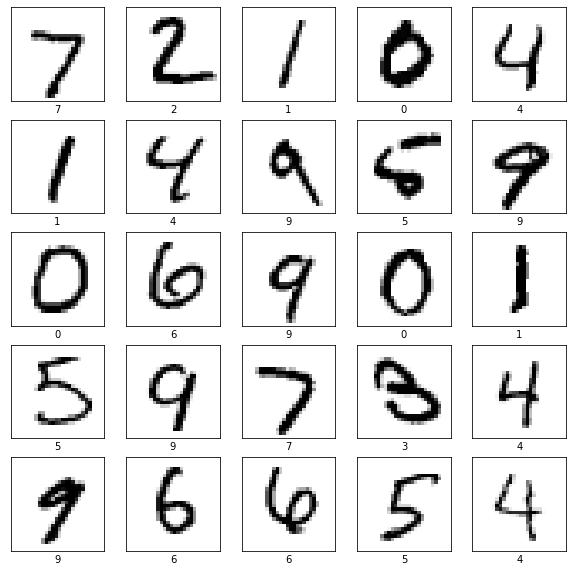

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i].reshape(img_rows, img_cols), cmap=plt.cm.binary)
    plt.xlabel(y_test_num[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.show()

## Build the model

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Train the model

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 44s 103ms/step - loss: 0.3595 - accuracy: 0.8896 - val_loss: 0.0883 - val_accuracy: 0.9753
Epoch 2/15
422/422 [==============================] - 44s 104ms/step - loss: 0.1142 - accuracy: 0.9650 - val_loss: 0.0644 - val_accuracy: 0.9822
Epoch 3/15
422/422 [==============================] - 43s 101ms/step - loss: 0.0878 - accuracy: 0.9725 - val_loss: 0.0574 - val_accuracy: 0.9833
Epoch 4/15
422/422 [==============================] - 43s 101ms/step - loss: 0.0735 - accuracy: 0.9775 - val_loss: 0.0460 - val_accuracy: 0.9870
Epoch 5/15
422/422 [==============================] - 44s 104ms/step - loss: 0.0632 - accuracy: 0.9805 - val_loss: 0.0417 - val_accuracy: 0.9888
Epoch 6/15
422/422 [==============================] - 43s 101ms/step - loss: 0.0576 - accuracy: 0.9822 - val_loss: 0.0411 - val_accuracy: 0.9890
Epoch 7/15
422/422 [==============================] - 43s 101ms/step - loss: 0.0522 - accuracy: 0.9839 - val_loss: 0.0356 - val_ac

## Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02512841671705246
Test accuracy: 0.9914000034332275
